### PAD S21415 
### Wstępna analiza danych i czyszczenie

#### Importy


In [198]:
# Praca z danymi
import pandas as pd
import numpy as np
import scipy
import sklearn
from scipy.stats import zscore

# Wizualizacja
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno



##### Konfiguracja wizualizacji
Tak, żeby wykresy były bardziej czytelne

In [199]:
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

#### Załadowanie danych do data frame'a i ich wyświetlenie
Zbadajmy pierwsze 100 rekordów

In [200]:
df = pd.read_csv('messy_data.csv')
print(f'Ilość rekordów: {len(df. index)}')
df.head(100)


Ilość rekordów: 200


,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,IF,D,Ideal,5.1,5.15,3.2,61.5,,3000
1,0.70,vvs2,E,premium,5.7,,3.52,62,59,4500
2,NaN,Si2,h,Good,4.3,4.31,,62.3,56,700
3,1.20,if,d,ideal,,6.82,4.2,61.7,58,10000
4,0.90,I1,J,Fair,6,,3.7,61.7,,2400
...,...,...,...,...,...,...,...,...,...,...
95,NaN,vvs2,D,good,6.4,6.42,3.97,,,8000
96,0.75,si1,I,Very good,5.9,5.88,3.65,62.3,,4400
97,1.40,VVS1,e,Premium,7.1,,4.40,62.7,58,11500
98,NaN,i1,F,Good,5.9,5.89,,62.8,55,2500


### Opis kolumn w kontekscie diamentów

- **carat**: 
  Jednostka masy dla diamentów, równa 200 miligramom. Wpływa na wartość diamentu; im większy karat, tym wyższa wartość.

- **x dimension**: 
  Długość diamentu w milimetrach, mierzona poziomo od jednego końca do drugiego.

- **y dimension**: 
  Szerokość diamentu, mierzona w milimetrach, od strony do strony.

- **z dimension**: 
  Głębokość diamentu, mierzona w milimetrach, od góry do dołu.

- **depth**: 
  Wysokość diamentu jako procent stosunku głębokości do średnicy lub po prostu w milimetrach, wpływa na błysk diamentu.

- **table**: 
  Płaska górna powierzchnia diamentu. Jej rozmiar ma wpływ na jakość szlifu.

- **price**: 
  Cena diamentu, ustalana na podstawie wszystkich jego cech, w tym karatów, szlifu, czystości i koloru.


#### Typ danych i kolumny

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         150 non-null    float64
 1    clarity      200 non-null    object 
 2    color        200 non-null    object 
 3    cut          200 non-null    object 
 4    x dimension  200 non-null    object 
 5    y dimension  200 non-null    object 
 6    z dimension  200 non-null    object 
 7    depth        200 non-null    object 
 8    table        200 non-null    object 
 9    price        200 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.8+ KB


Jak widać Python potraktował typy kolumn jako obiektowe, pomimo że są to dane numeryczne. Należy to obsłużyć

#### Rozkład danych numerycznych i konwersja typów danych
Kolumny posiadają znaki białe przed ich nazwami. Należy to oczyścić. Następnie należy zbadać typy danych i je skorygować. Tak aby można było w następnej fazie na nich pracować

In [202]:
print(df.columns)
df = df.rename(columns=lambda x: x.strip())  # Usuwa białe znaki z początku i końca nazw

df['x dimension'] = pd.to_numeric(df['x dimension'], errors='coerce')
df['y dimension'] = pd.to_numeric(df['y dimension'], errors='coerce')
df['z dimension'] = pd.to_numeric(df['z dimension'], errors='coerce')
df['depth'] = pd.to_numeric(df['depth'], errors='coerce')
df['table'] = pd.to_numeric(df['table'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df.describe()

Index(['carat', ' clarity', ' color', ' cut', ' x dimension', ' y dimension',
       ' z dimension', ' depth', ' table', ' price'],
      dtype='object')


,carat,x dimension,y dimension,z dimension,depth,table,price
count,150.000000,197.000000,136.000000,152.000000,133.000000,167.000000,196.000000
mean,0.799000,5.885787,5.829706,3.694671,62.316541,56.910180,11410.714286
std,0.321827,0.770172,0.767402,0.462431,0.326408,1.421972,40072.669086
min,0.200000,3.900000,3.890000,2.410000,61.200000,54.000000,500.000000
25%,0.512500,5.300000,5.290000,3.350000,62.100000,56.000000,2600.000000
50%,0.750000,5.900000,5.850000,3.715000,62.300000,57.000000,4350.000000
75%,1.050000,6.500000,6.512500,4.082500,62.600000,58.000000,7900.000000
max,1.600000,7.300000,7.280000,4.500000,63.000000,60.000000,350000.000000


powyżej znajdują się dane statystyczne na kolumnach (przed ich oczyszczeniem oraz uzupełnieniem/skasowaniem braków)

#### Brakujące wartości

In [203]:
missing = df.isnull().sum()
print('Brakujące wartości: \n')
print(missing)
print('\nProcent brakujących wartości w każdej kolumnie: ')
total = len(df)
missing_percent = (df.isnull().sum() / total) * 100
print(missing_percent)
total_missings = df.isnull().sum().sum()
total_missing_percentage = (total_missings / (total * df.shape[1])) * 100
print(f'\nProcent całkowitej liczby pustych wartości: {round(total_missing_percentage,2)}%')


Brakujące wartości: 

carat          50
clarity         0
color           0
cut             0
x dimension     3
y dimension    64
z dimension    48
depth          67
table          33
price           4
dtype: int64

Procent brakujących wartości w każdej kolumnie: 
carat          25.0
clarity         0.0
color           0.0
cut             0.0
x dimension     1.5
y dimension    32.0
z dimension    24.0
depth          33.5
table          16.5
price           2.0
dtype: float64

Procent całkowitej liczby pustych wartości: 13.45%


Nasz zbiór danych jest mały, dlatego 13.45% uznaję jako wysoki procent braków w kolumnach

# Strategia uzupełniania brakujących danych

1. **Karata (50 brakujących)**: Rregresja do oszacowania na podstawie innych wymiarów.

2. **Wymiary X, Y, Z (3, 64, 48 brakujących)**: Estymacja na podstawie dostępnych danych.

3. **Głębokość (67 brakujących)**: Średnia/mediana lub obliczenia, jeśli wymiary X, Y, Z są dostępne.

4. **Tabela (33 brakujące)**: Średnią/mediana.

5. **Cena (4 brakujące)**: Usunąć lub szacunek regresją.

Dane zostną uzupełnione w następnych krokach po zbadaniu ich dokładniej



### Znalezienie duplikatów

In [204]:
duplicate_rows = df[df.duplicated(keep=False)]
number_of_duplicates = duplicate_rows.shape[0]

print(f'Liczba duplikatów w danych: {number_of_duplicates}')

Liczba duplikatów w danych: 0


W naszym zbiorze nie występują duplikaty. Nie musimy czyścić z nich danych

#### Analiza wartości odstających

Wykorzystamy wykresy pudełkowe do zidentyfikowania potencjalnych wartości odstających w naszych danych.



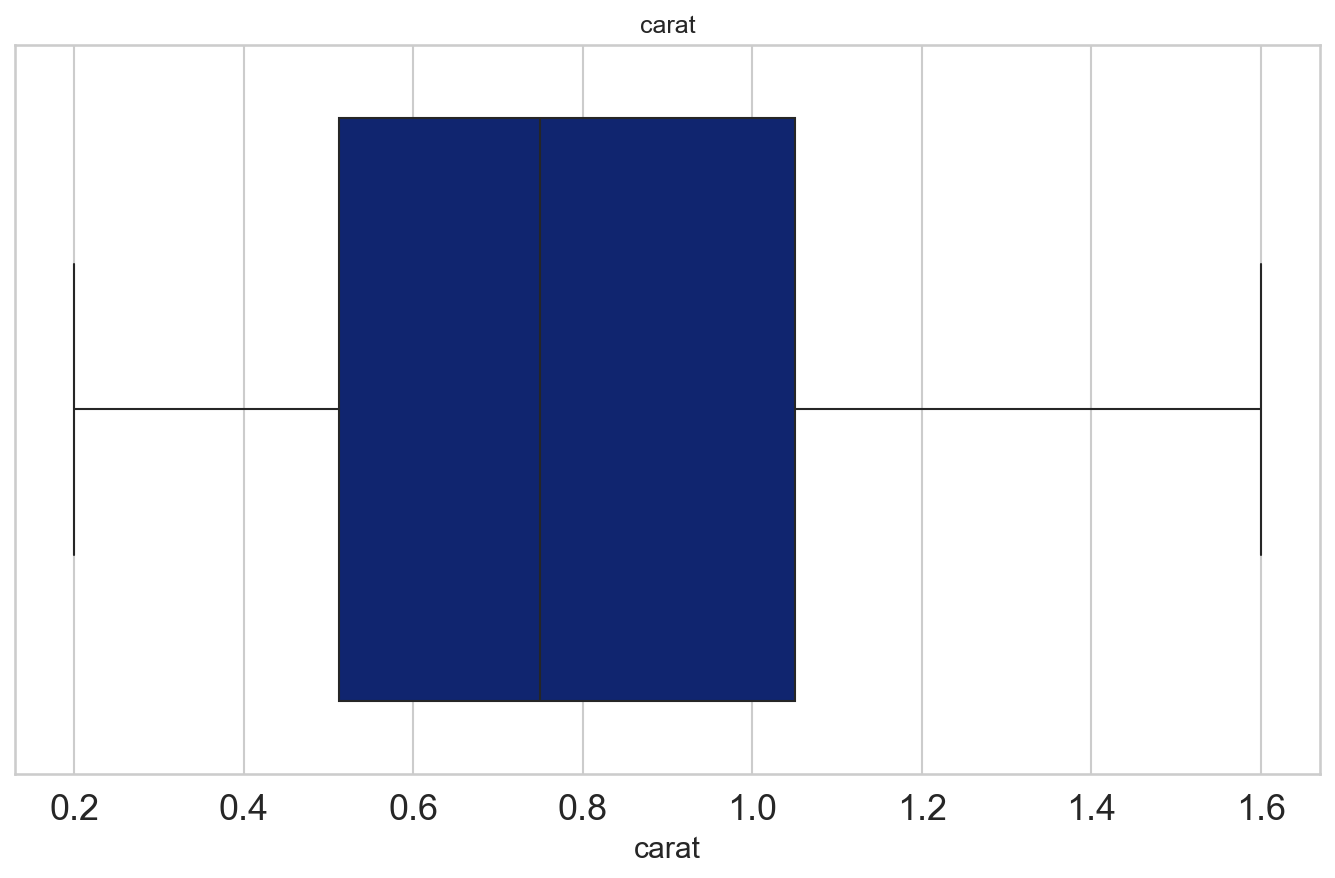

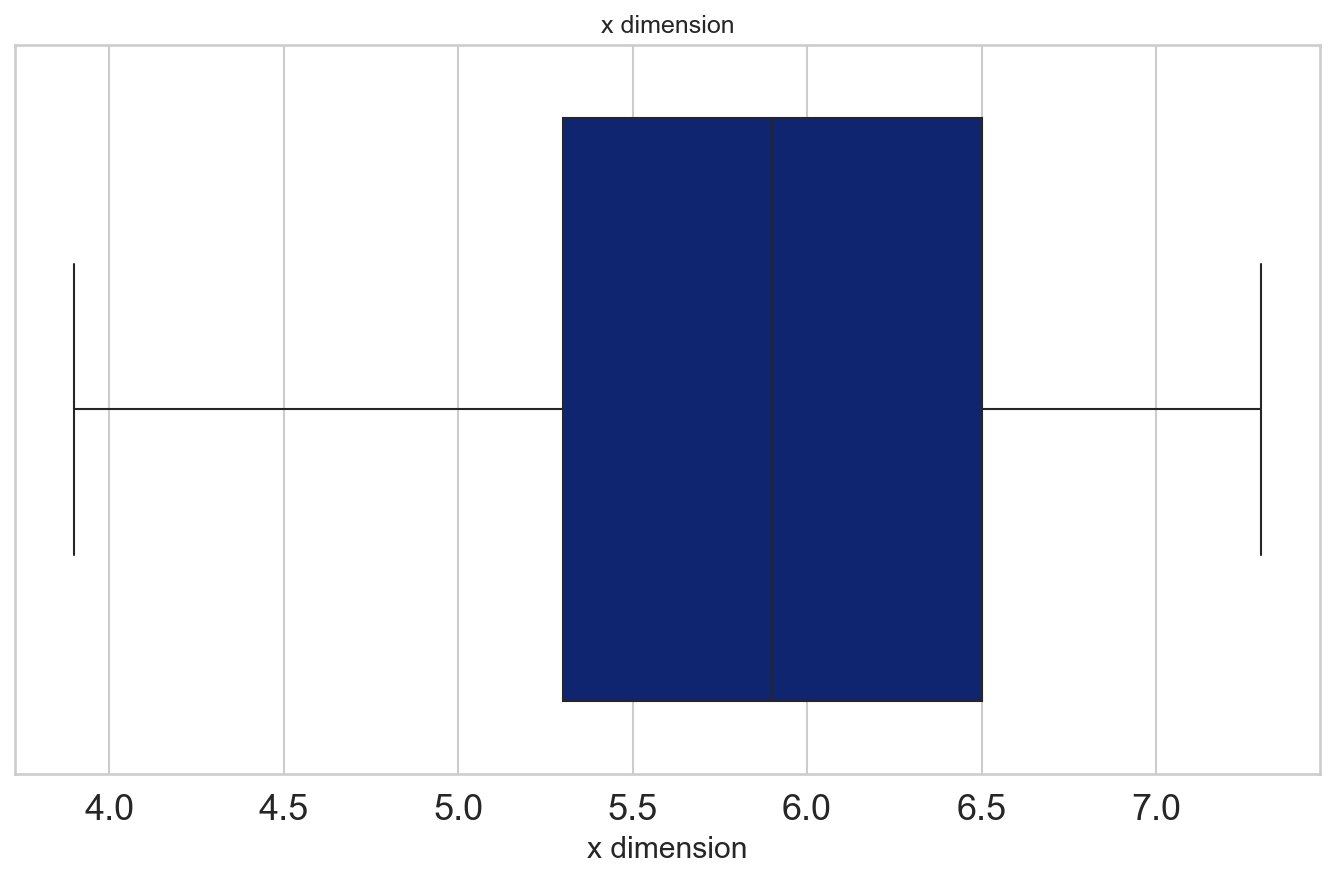

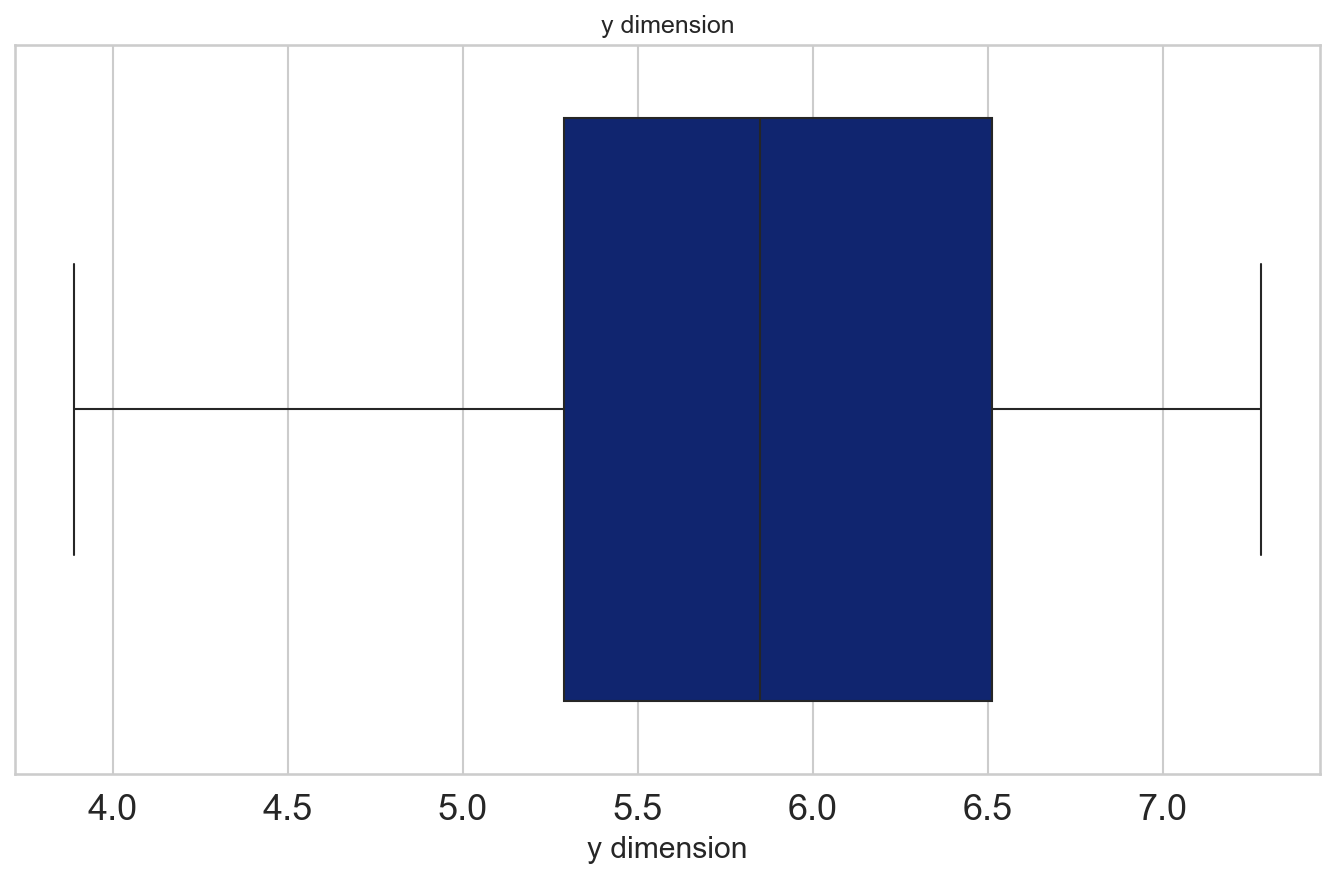

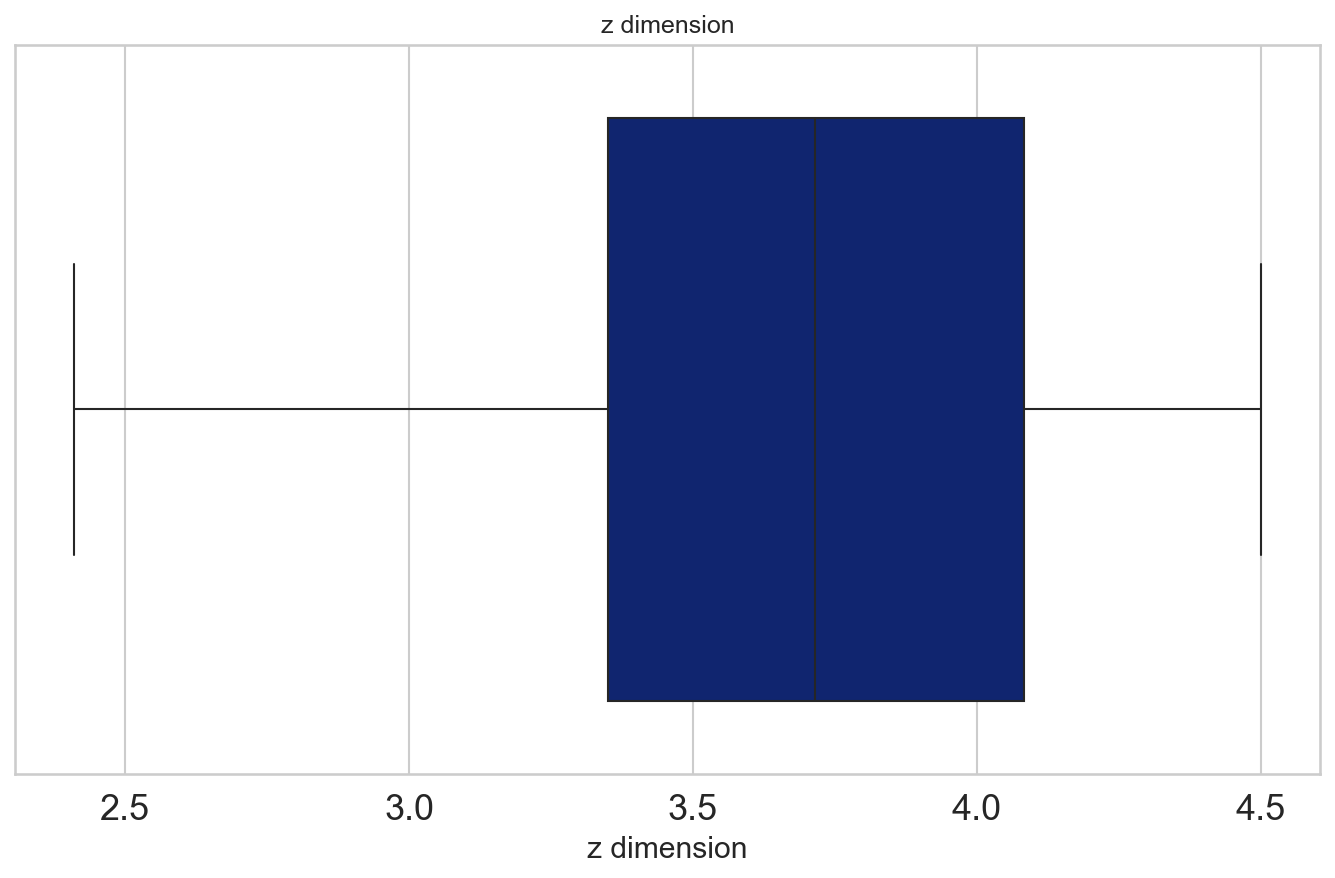

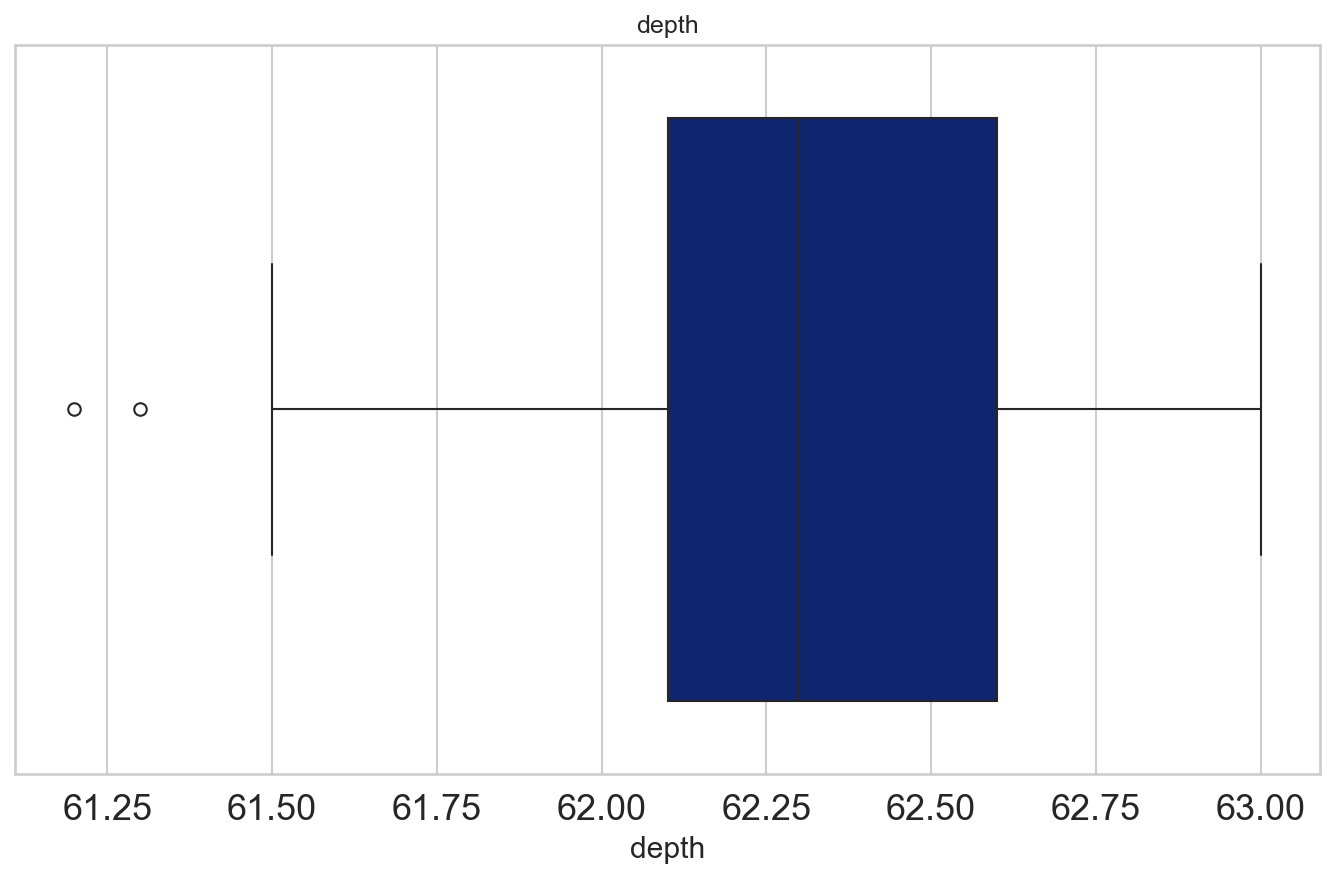

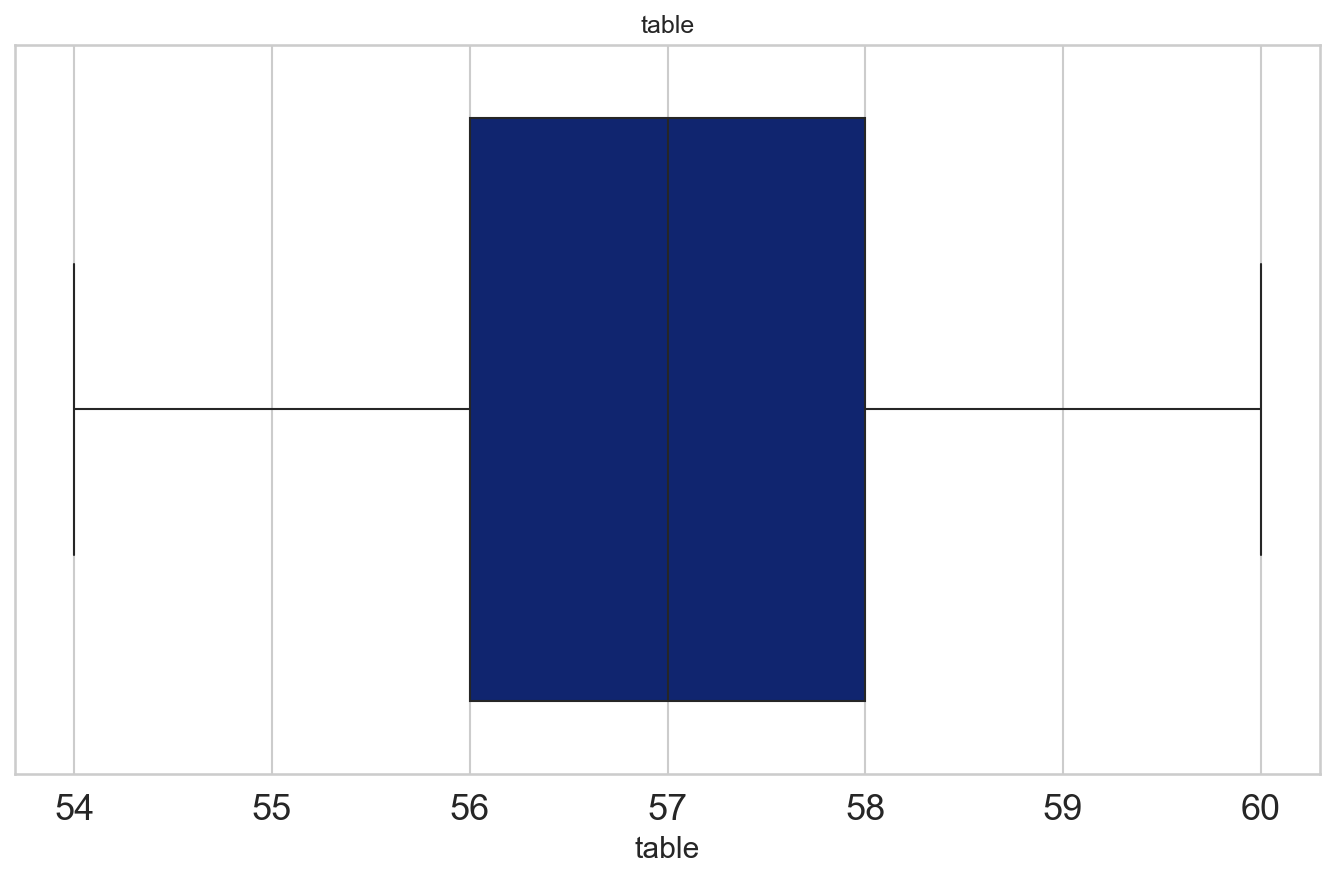

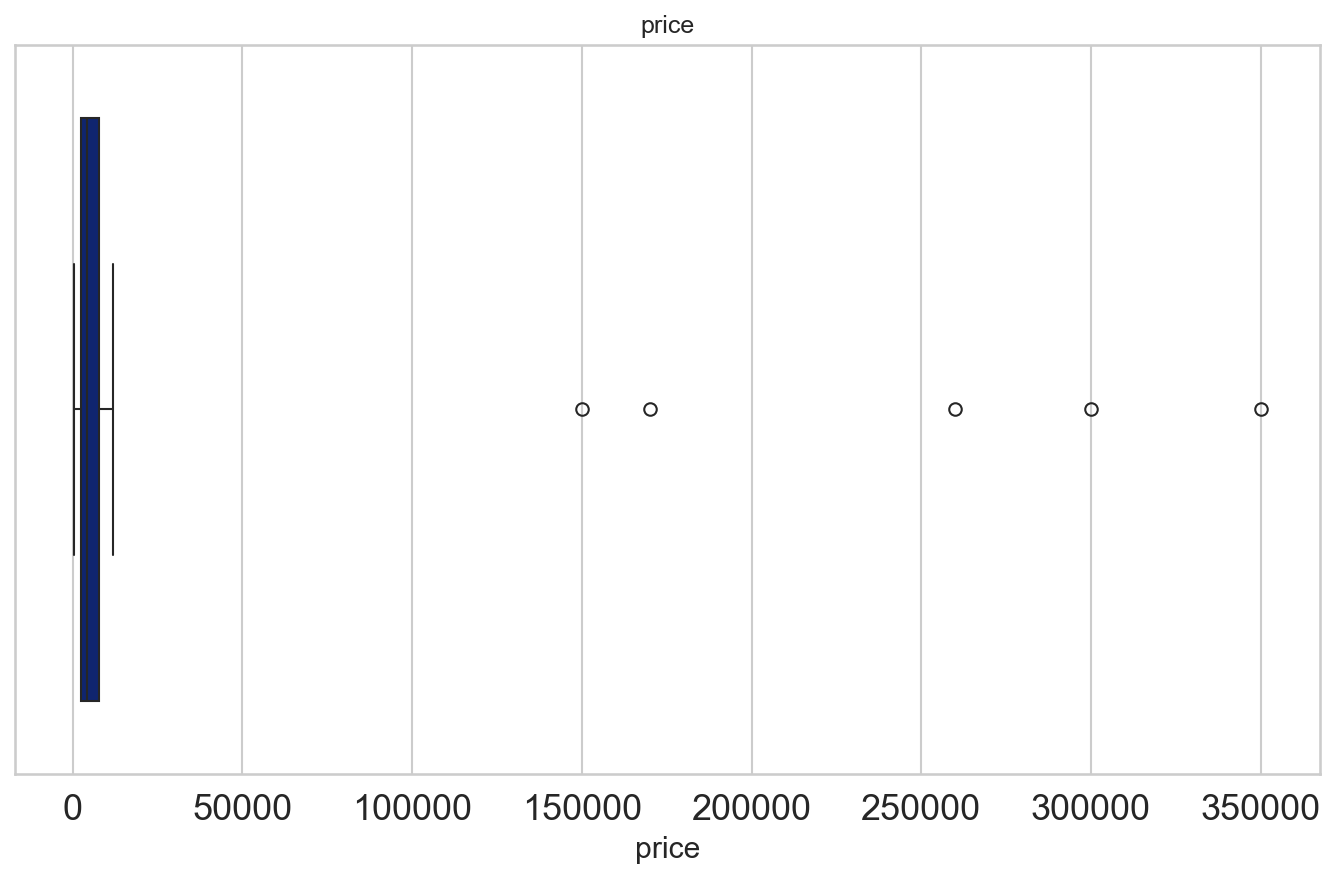

In [205]:

features = ['carat', 'x dimension', 'y dimension', 'z dimension', 'depth', 'table', 'price']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(feature)
    plt.show()

###### Z wykresów wynika że zmienna price i zmienna depth mają wartości odstające. Należy je zbadać
#### Wartości odstające
##### Poza wąsy wykresów pudełkowych

In [206]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    if not outliers.empty:
        print(f"Wartości odstające dla kolumny {column}:")
        print(outliers, '\n')

Wartości odstające dla kolumny depth:
    carat clarity color         cut  x dimension  y dimension  z dimension  \
11    0.4    vvs2     G   Very good          4.9         4.88          NaN   
15    NaN    vvs2     I        Good          4.4         4.39         2.69   

    depth  table   price  
11   61.2   56.0  1400.0  
15   61.3   57.0     NaN   

Wartości odstające dla kolumny price:
     carat clarity color         cut  x dimension  y dimension  z dimension  \
182    NaN      i1     G       Ideal          5.2         5.24         3.23   
184   1.40     Si2     D   Very good          7.3          NaN         4.50   
187   0.90      IF     G   very good          6.3          NaN         3.90   
189    NaN    VVS2     D        fair          6.7          NaN         4.14   
197   0.55      i1     I     Premium          5.3          NaN         3.28   

     depth  table     price  
182    NaN   57.0  170000.0  
184   62.6   59.0  350000.0  
187    NaN   57.0  260000.0  
189   62.2 

#### Macierz korelacji między zmiennymi

Przed uzupełnieniem braków (Wartości puste nie zostaną uwzględnione)

Uwzględniamy tylko dane liczbowe


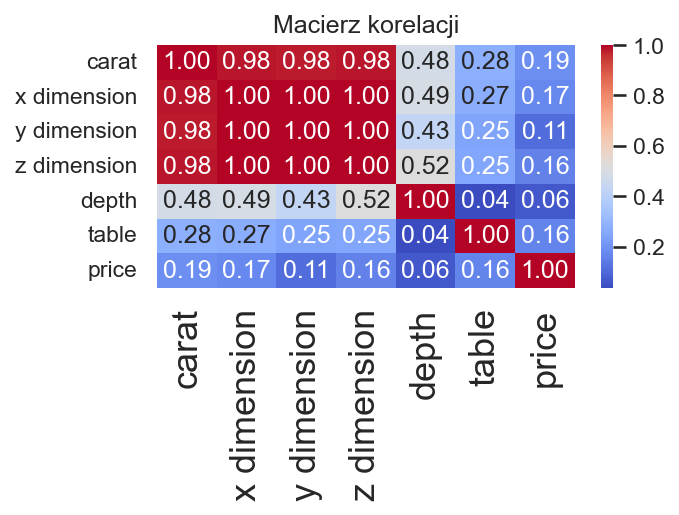

In [207]:
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix_before = df_numeric.corr()

plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix_before, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Macierz korelacji")
plt.show()


Wysoka korelacja między cechami związanych z rozmiarem: Widać, że cechy carat, x dimension, y dimension oraz z dimension mają bardzo wysokie współczynniki korelacji, zbliżone do 1. Oznacza to, że są one silnie ze sobą powiązane. W praktyce, rozmiar kamienia jest zazwyczaj proporcjonalny do jego wymiarów.

Średnia korelacja między depth a dimensions oraz carat

#### Z-score
##### Obserwacje o wartościach Z-Score większych niż 3 lub mniejszych niż -3 można uznać za wartości odstające

In [208]:
# Upewnij się, że dane są w odpowiednim formacie
df['carat'] = pd.to_numeric(df['carat'], errors='coerce')

# Oblicz z-score dla całej kolumny 'carat' z pominięciem wartości NaN
df['carat_zscore'] = zscore(df['carat'].dropna())

# Wartości NaN w 'carat' będą miały odpowiednik NaN w 'carat_zscore'
# Tworzymy nową serię, która będzie miała tyle samo elementów co df['carat']
# a następnie przypiszemy jej wartości obliczonego z-score zgodnie z oryginalnym indeksem.
carat_zscores = pd.Series(data=zscore(df['carat'].dropna()), index=df['carat'].dropna().index)

# Teraz tworzymy nową kolumnę 'carat_zscore' która jest pusta
df['carat_zscore'] = pd.NaT

# Wstawiamy wartości zscore do nowej kolumny zgodnie z ich oryginalnym indeksem.
df.loc[carat_zscores.index, 'carat_zscore'] = carat_zscores

# Wyświetlenie DataFrame
print(df[['carat', 'carat_zscore']])

     carat carat_zscore
0     0.50    -0.932182
1     0.70    -0.308649
2      NaN          NaT
3     1.20     1.250184
4     0.90     0.314884
..     ...          ...
195   0.45    -1.088065
196   1.25     1.406067
197   0.55    -0.776299
198   0.85     0.159001
199    NaN          NaT

[200 rows x 2 columns]


C:\Users\mateu\AppData\Local\Temp\ipykernel_19488\2045195367.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.93218216 -0.30864894  1.2501841   0.31488427 -0.93218216 -1.24394876
  0.62665088 -0.93218216 -1.24394876  0.93841749 -0.77629885 -0.93218216
  0.62665088 -0.62041555 -0.30864894  1.5619507   1.87371731  2.49725053
 -1.86748198 -1.39983207 -0.77629885 -0.46453225  2.18548392  0.31488427
 -1.08806546 -0.62041555  0.47076758  0.78253419 -1.08806546  0.15900097
  0.47076758 -1.39983207 -0.77629885  0.78253419 -0.15276564 -0.46453225
  1.87371731 -1.55571537 -0.93218216  1.5619507  -1.24394876  1.09430079
 -0.77629885 -0.62041555 -1.39983207 -0.15276564  0.78253419 -1.24394876
 -0.77629885 -0.30864894  0.31488427 -0.93218216 -1.08806546  1.2501841
 -0.46453225 -0.77629885  1.5619507  -0.15276564 -0.93218216  0.15900097
  0.93841749  0.31488427 -0.93218216 -1.24394876  1.09430079 -0.30864894
 -0.46453225

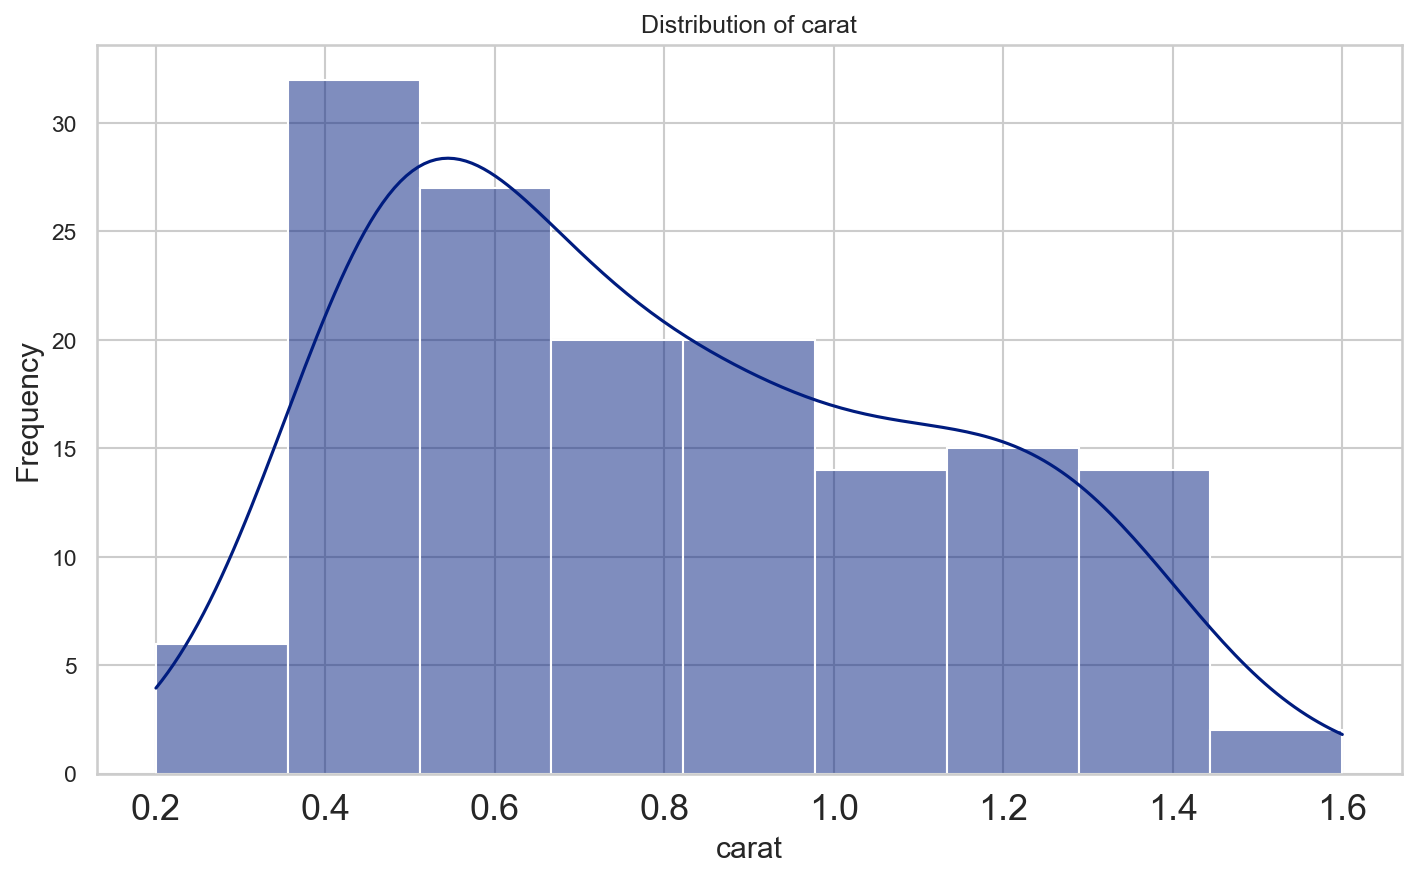

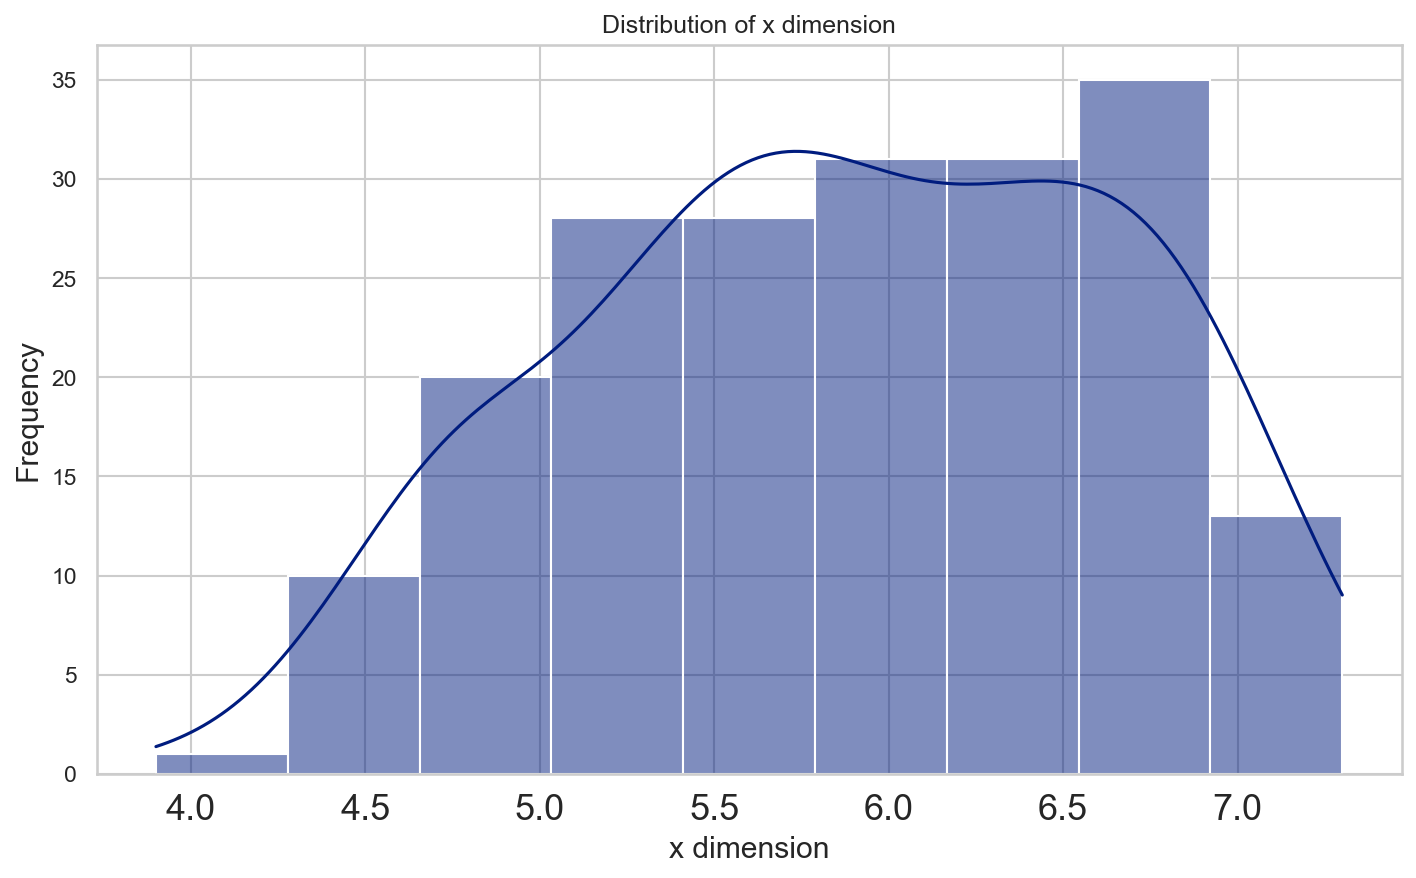

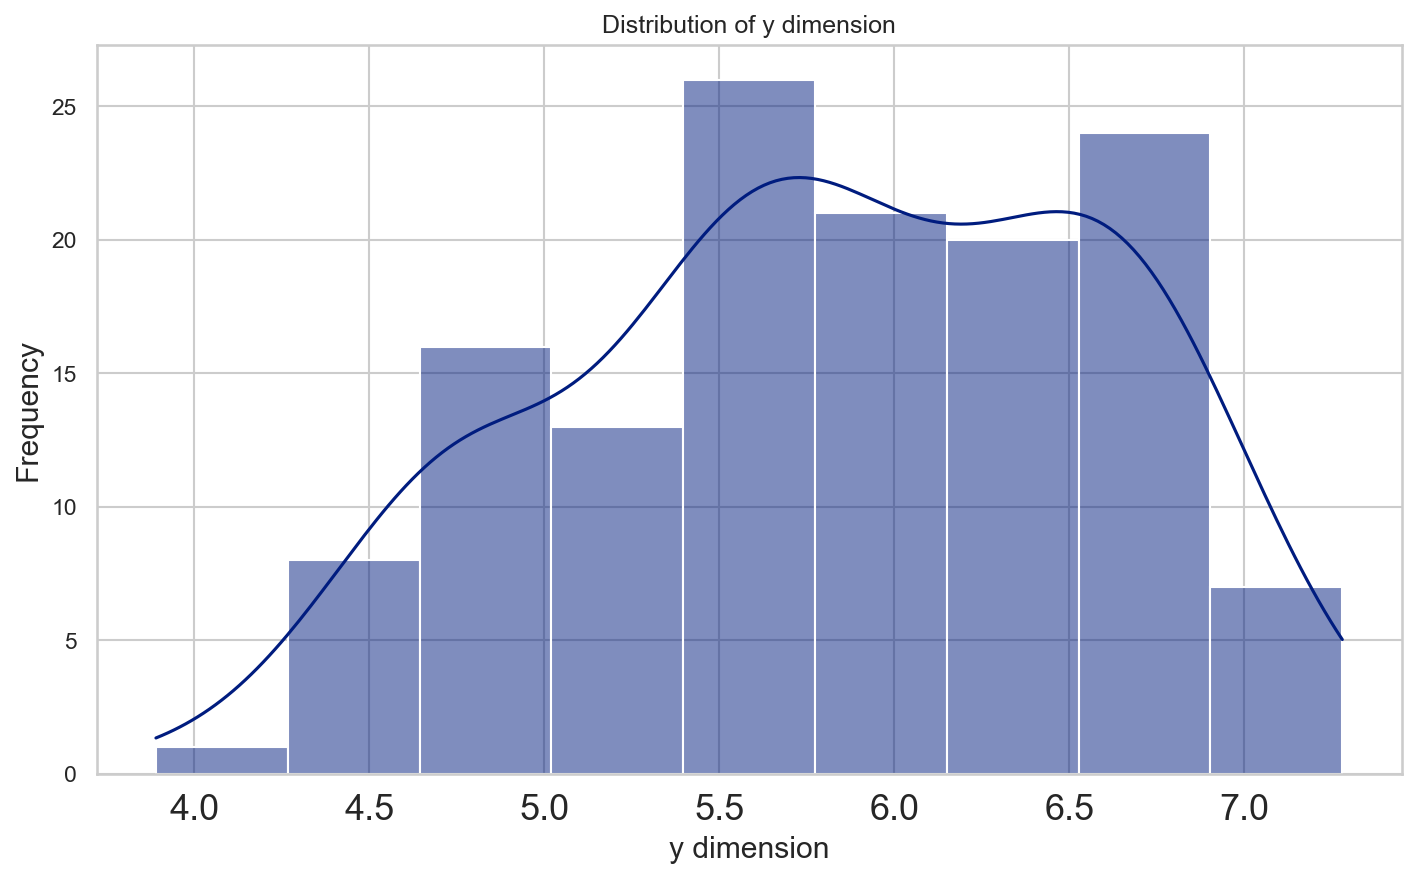

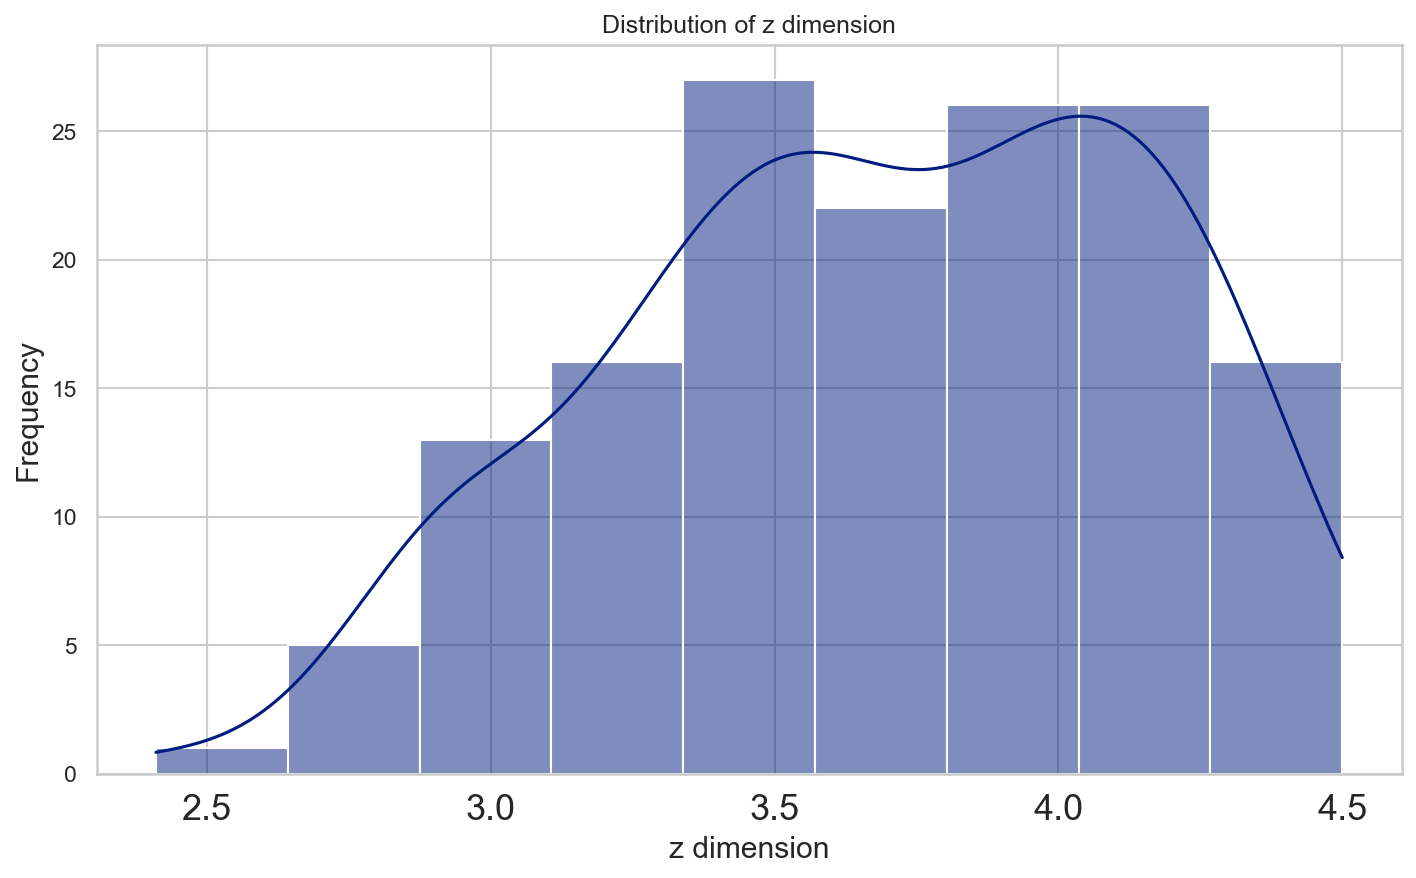

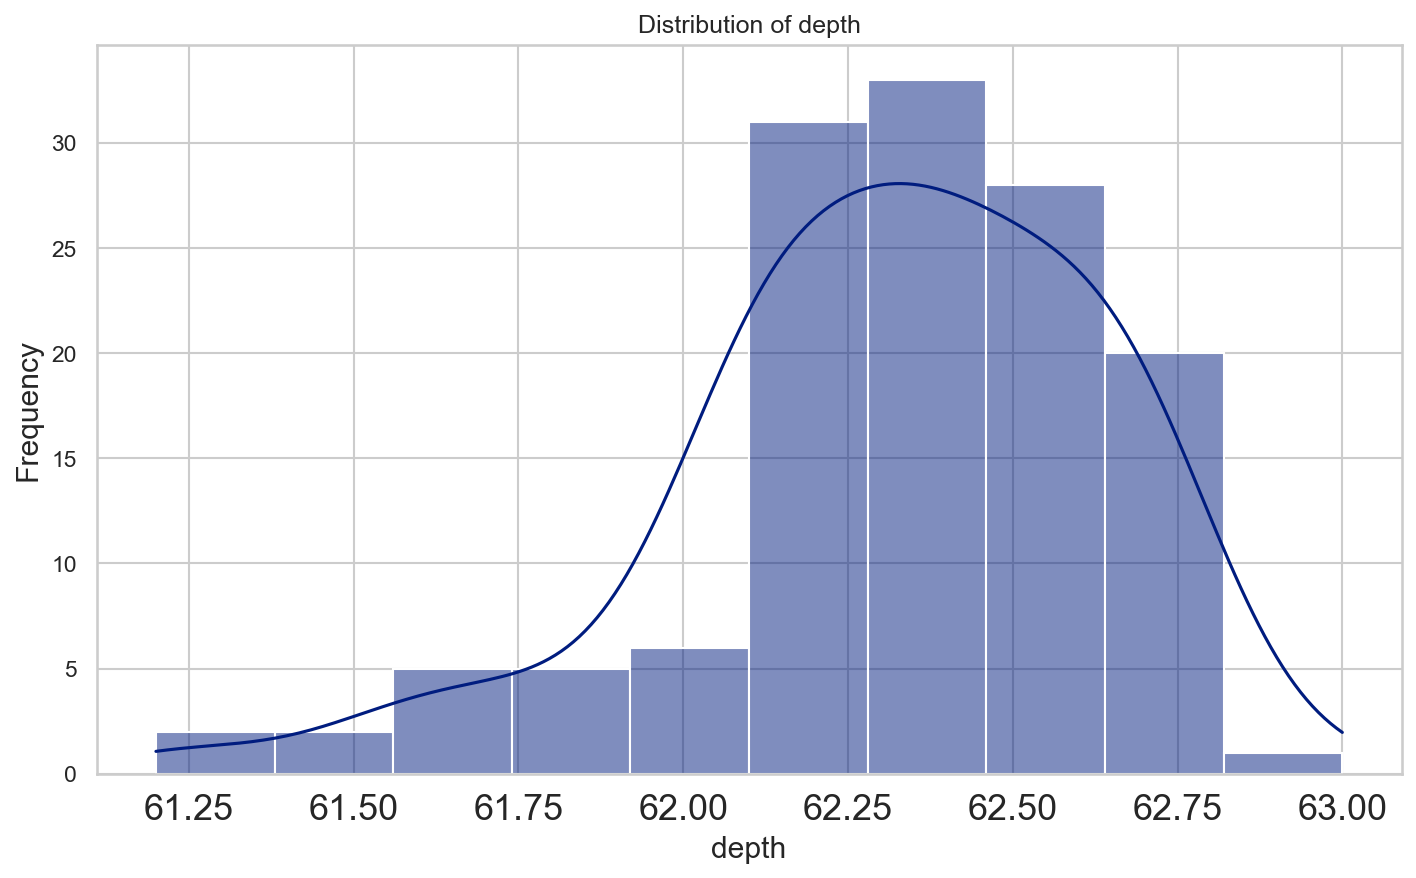

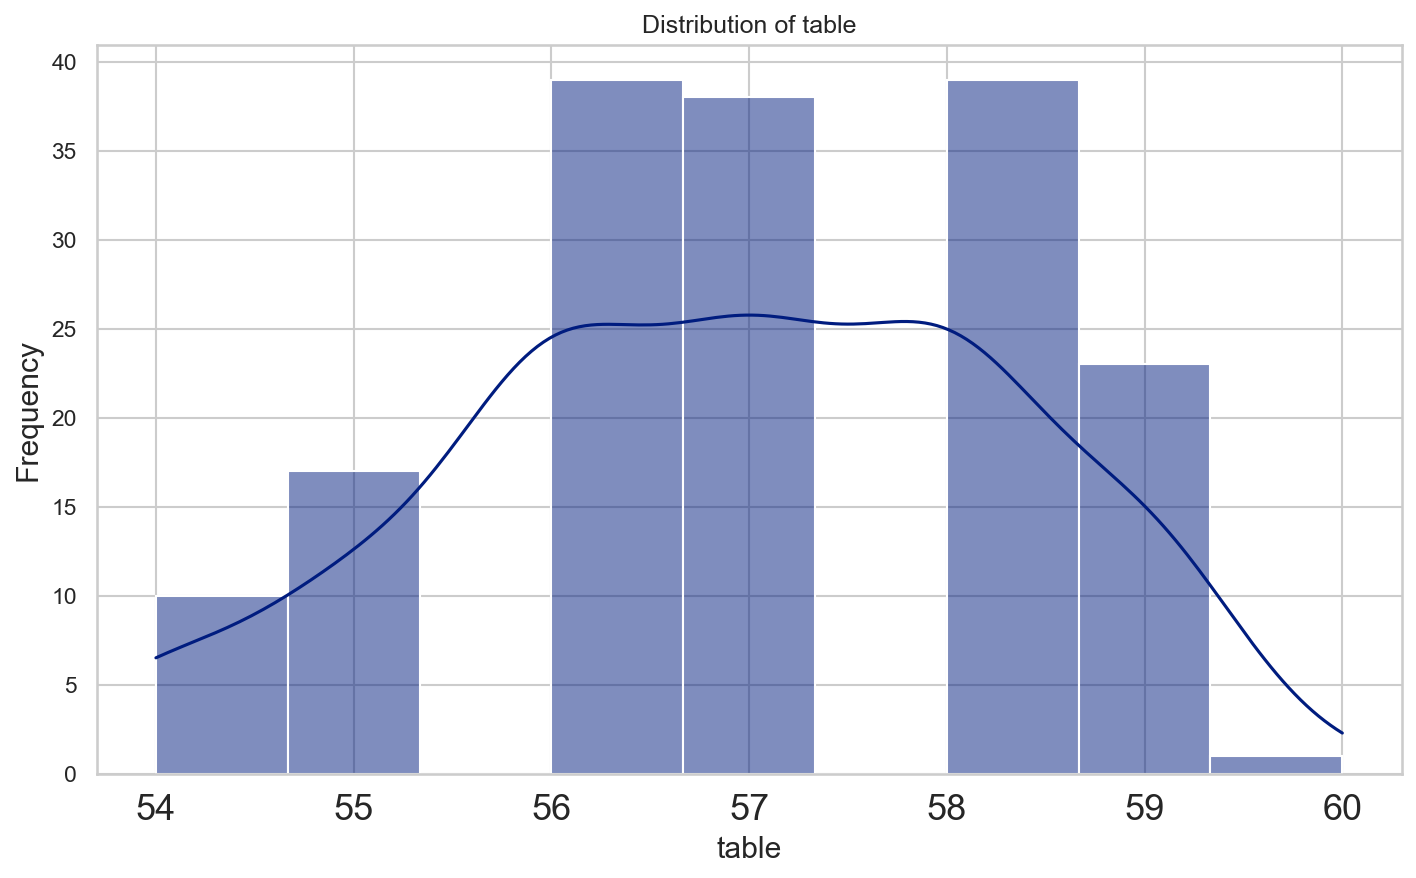

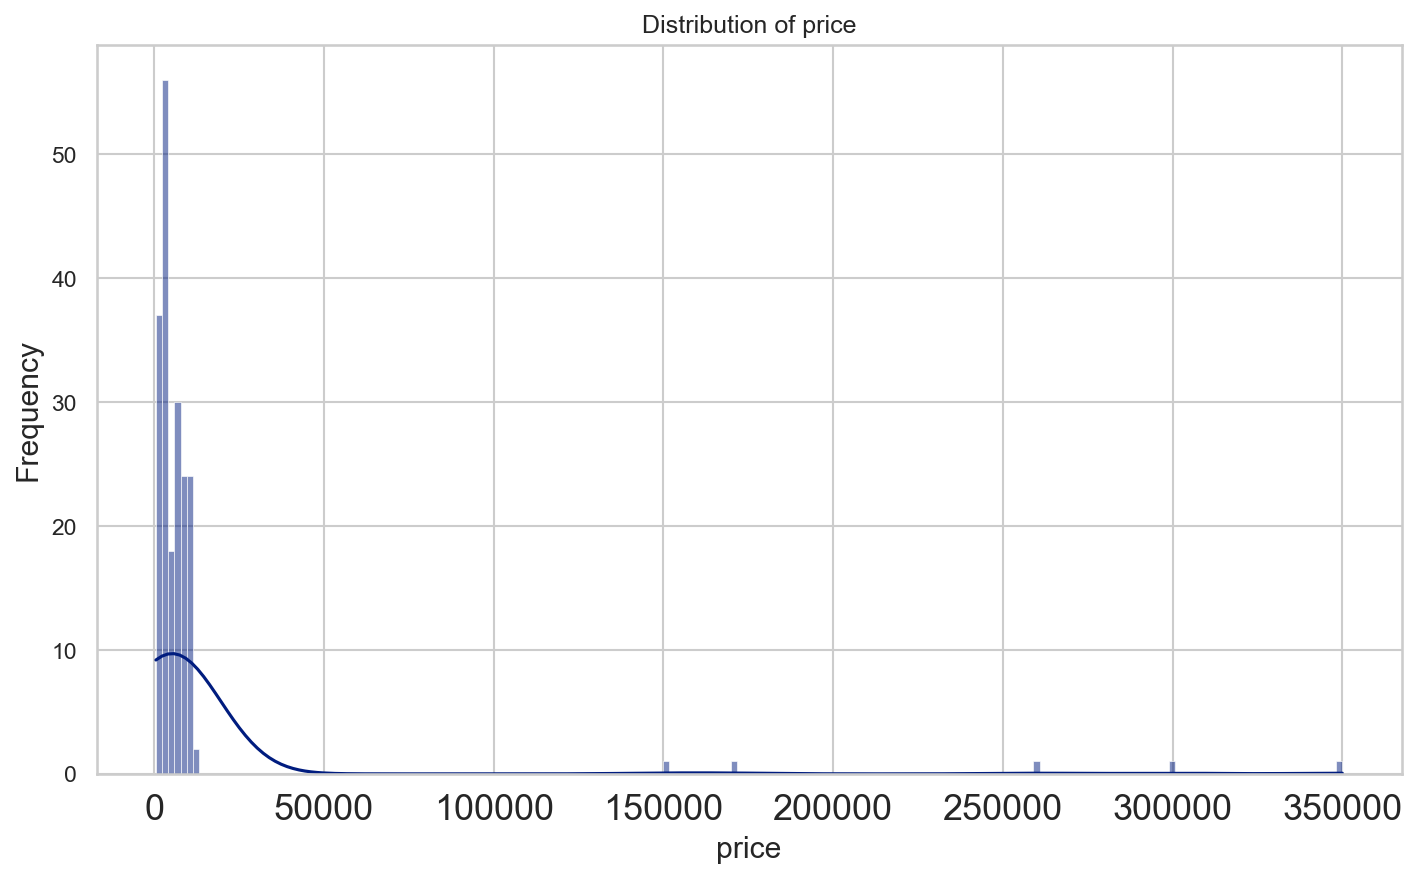

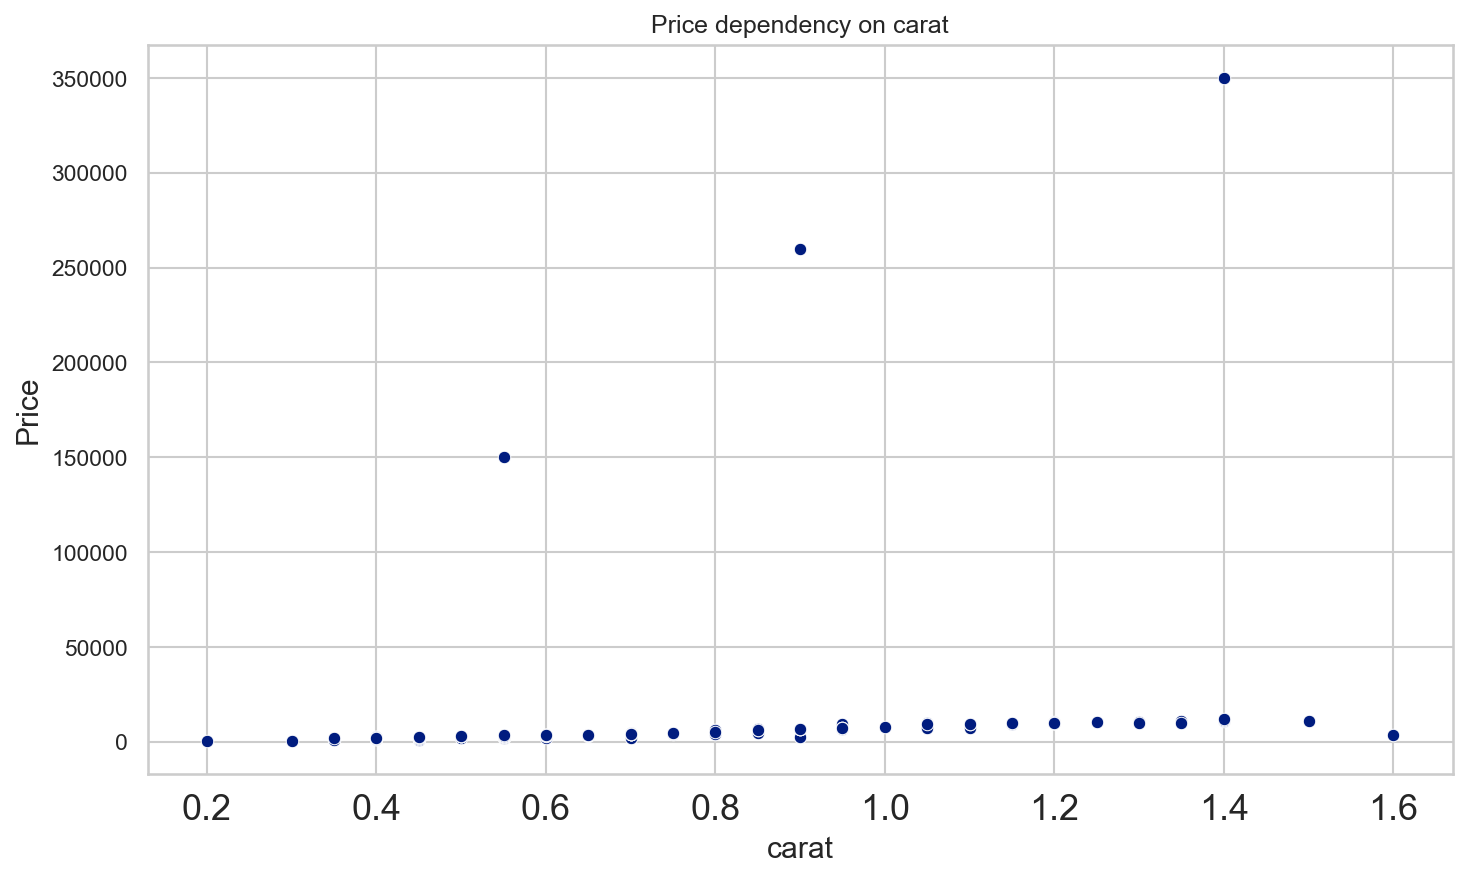

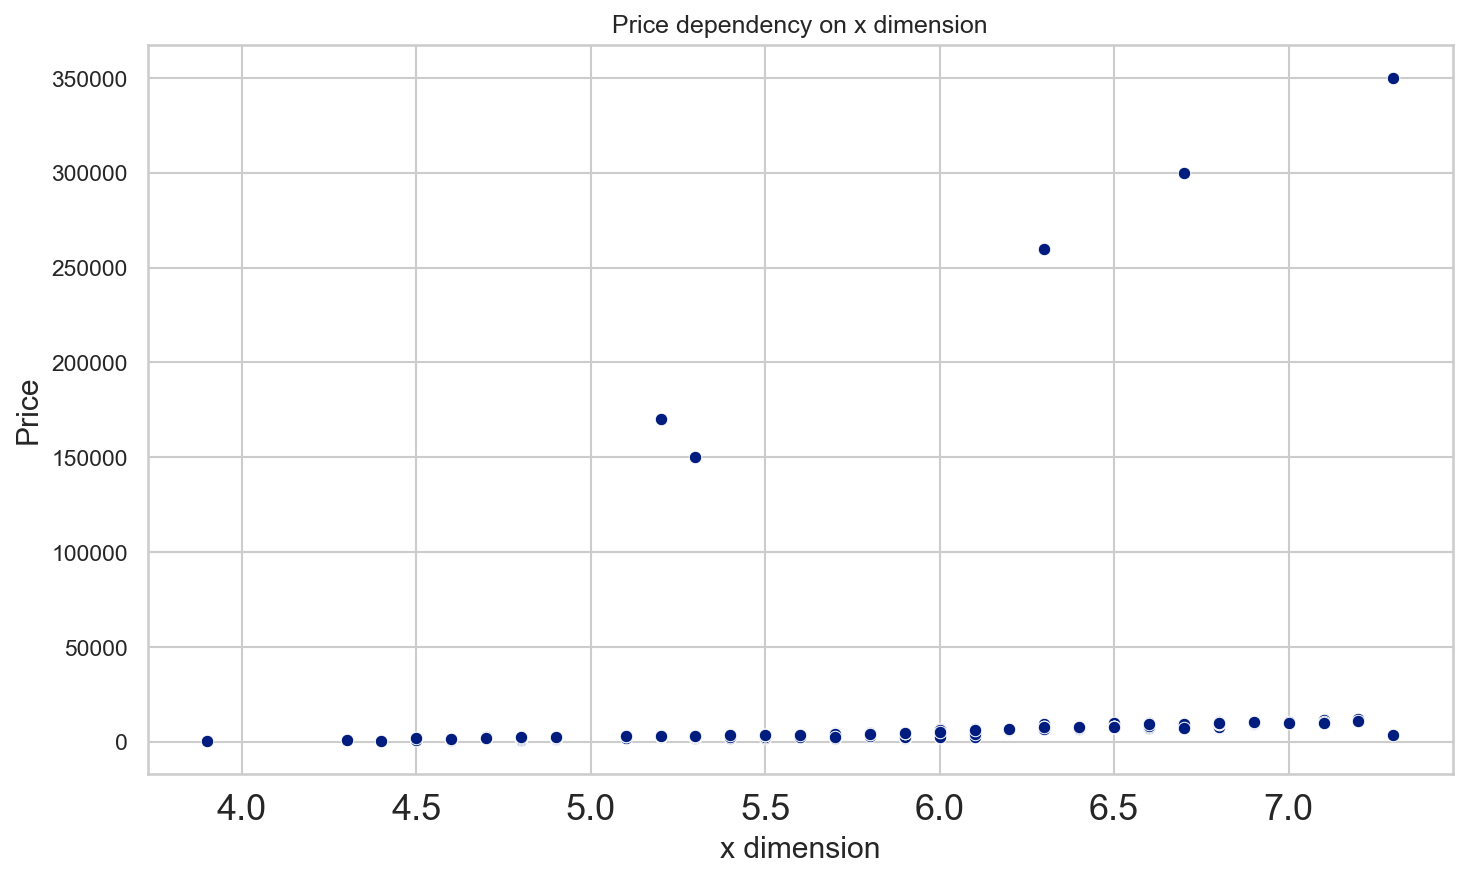

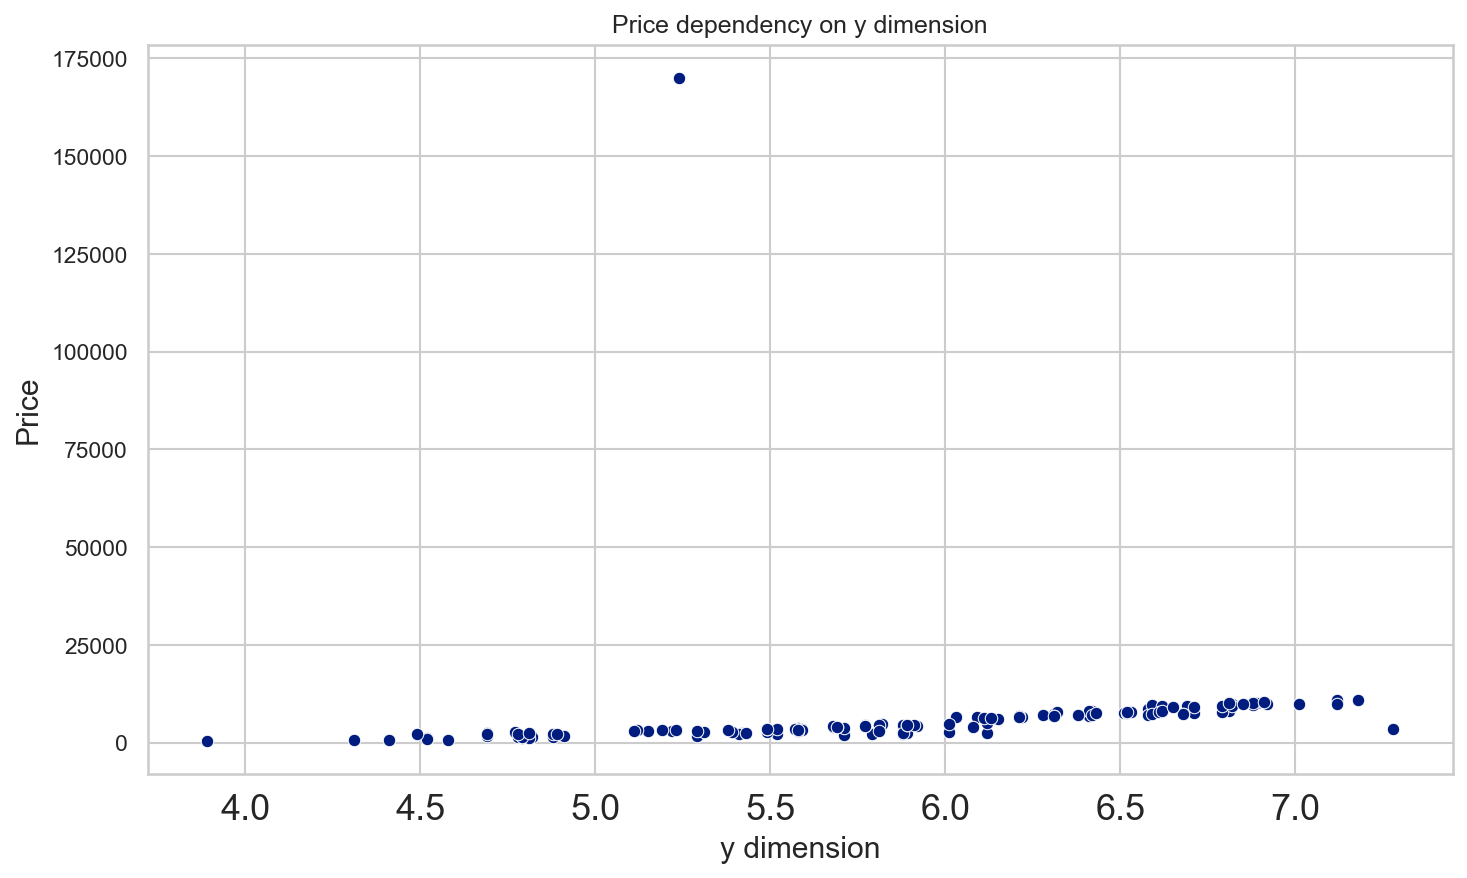

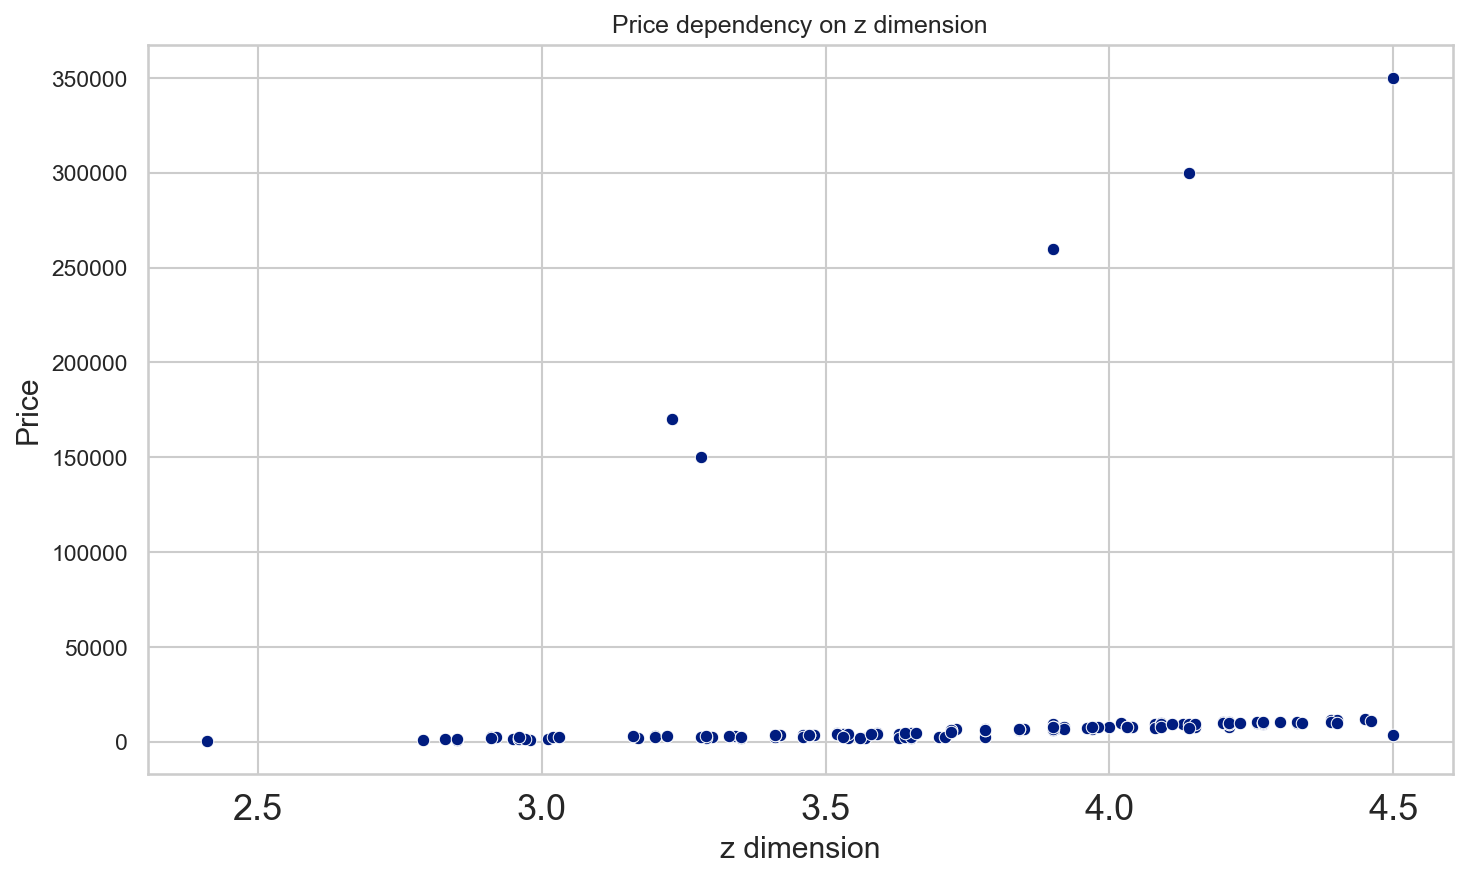

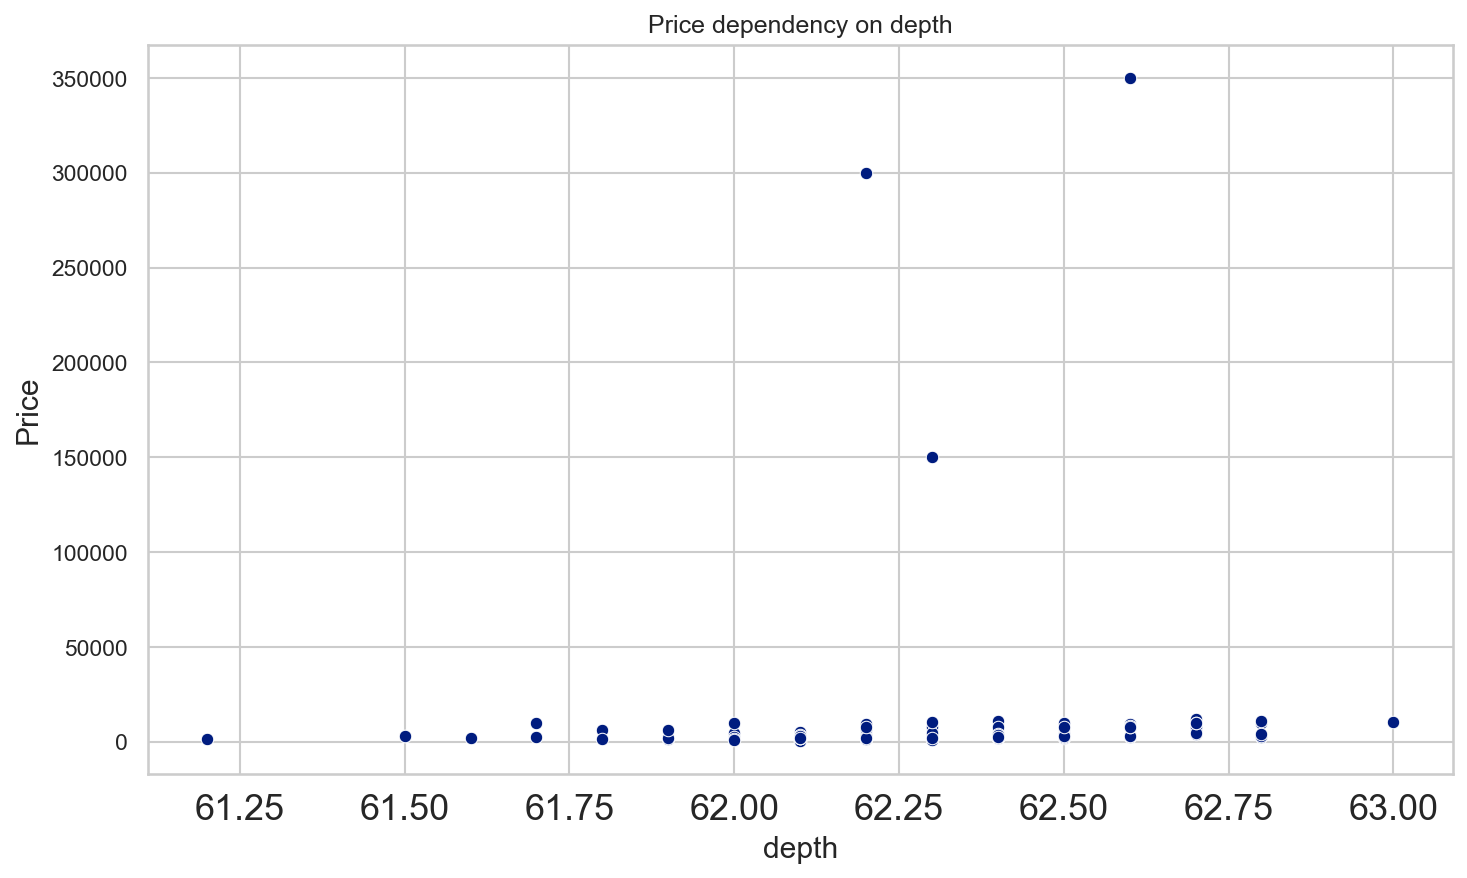

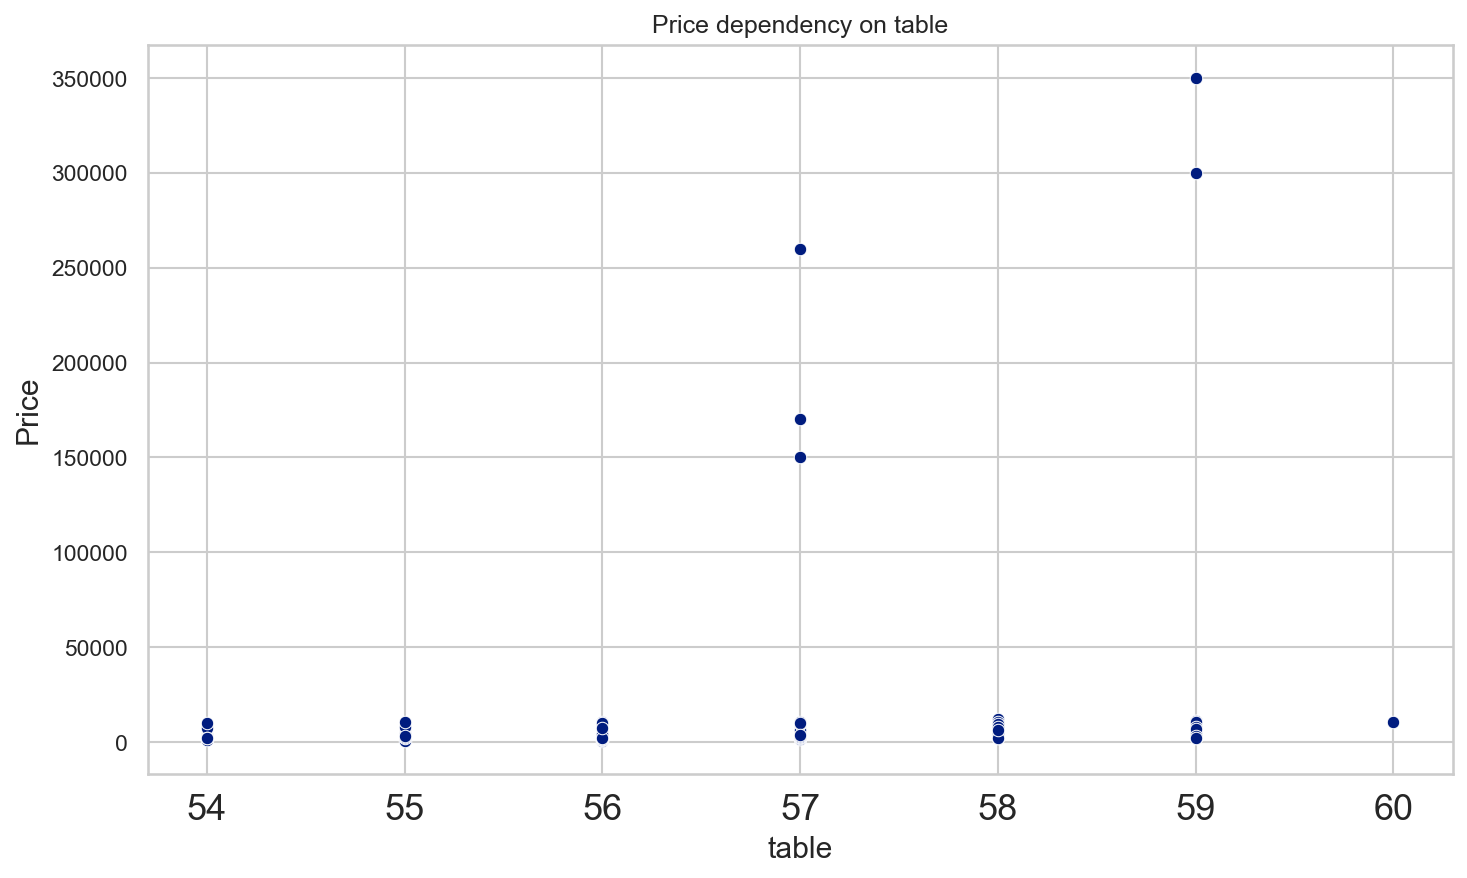

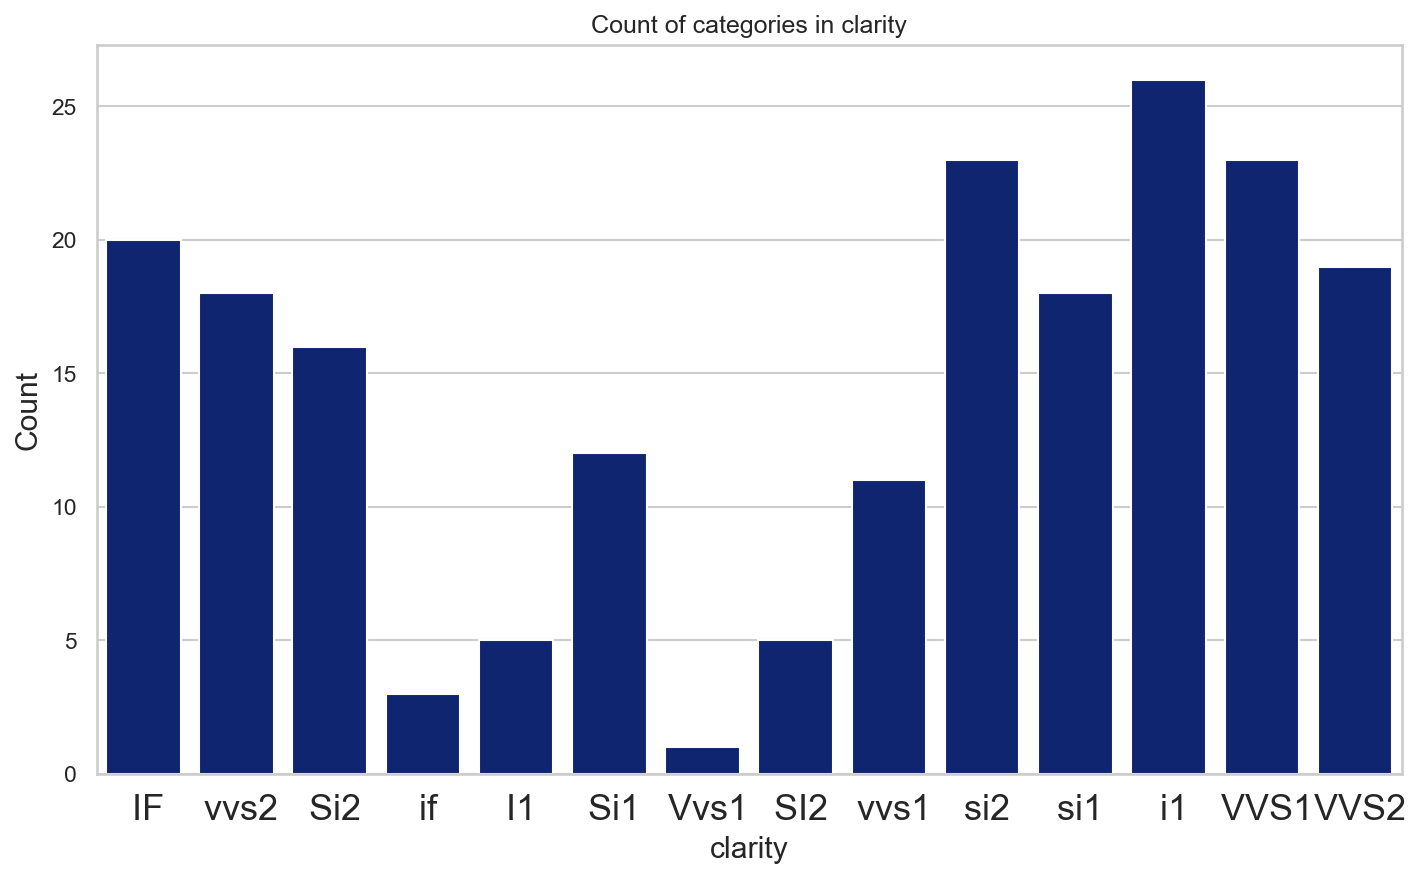

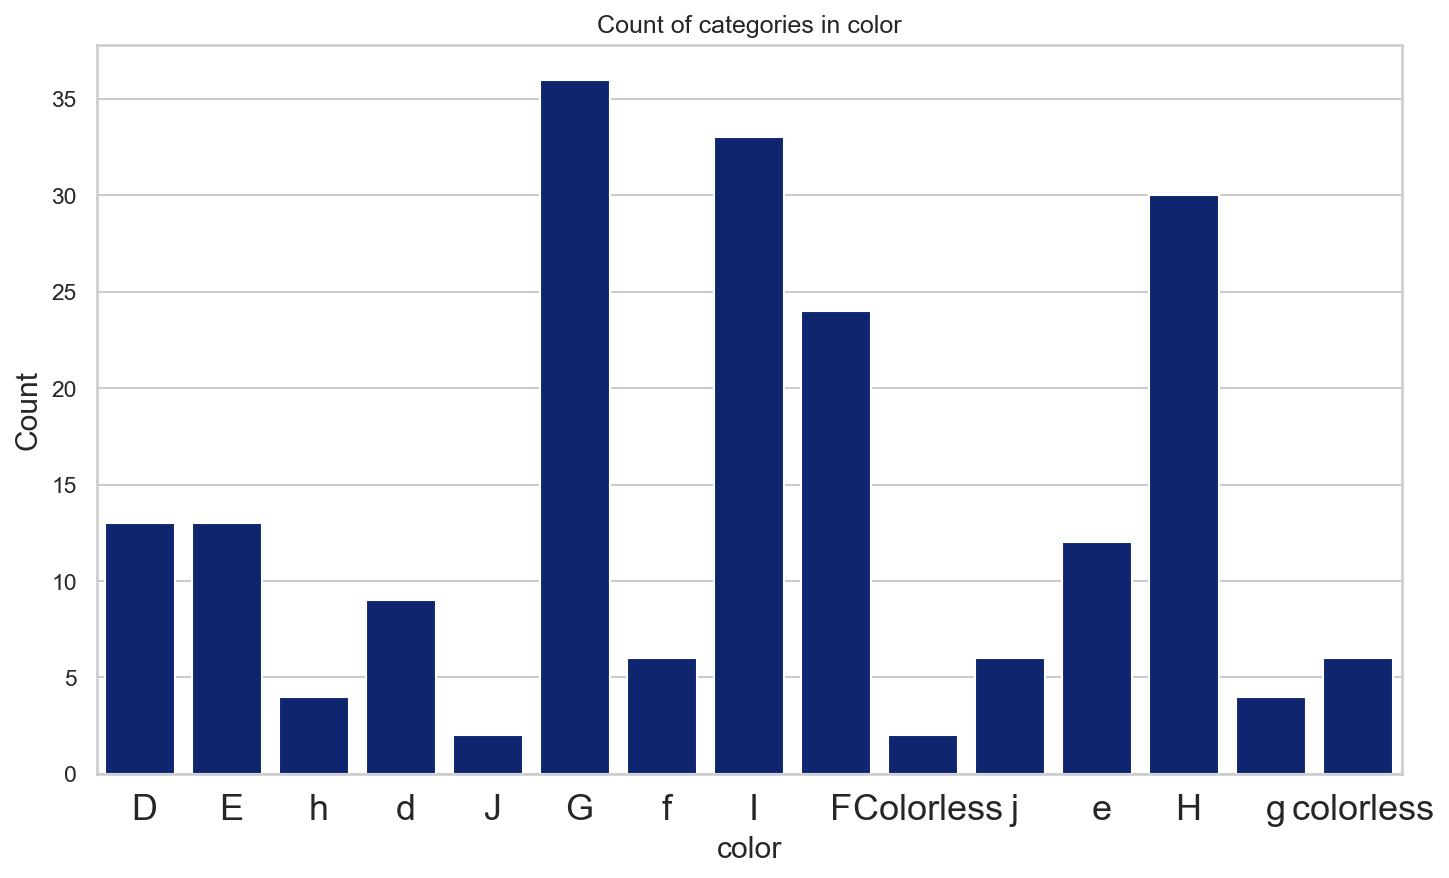

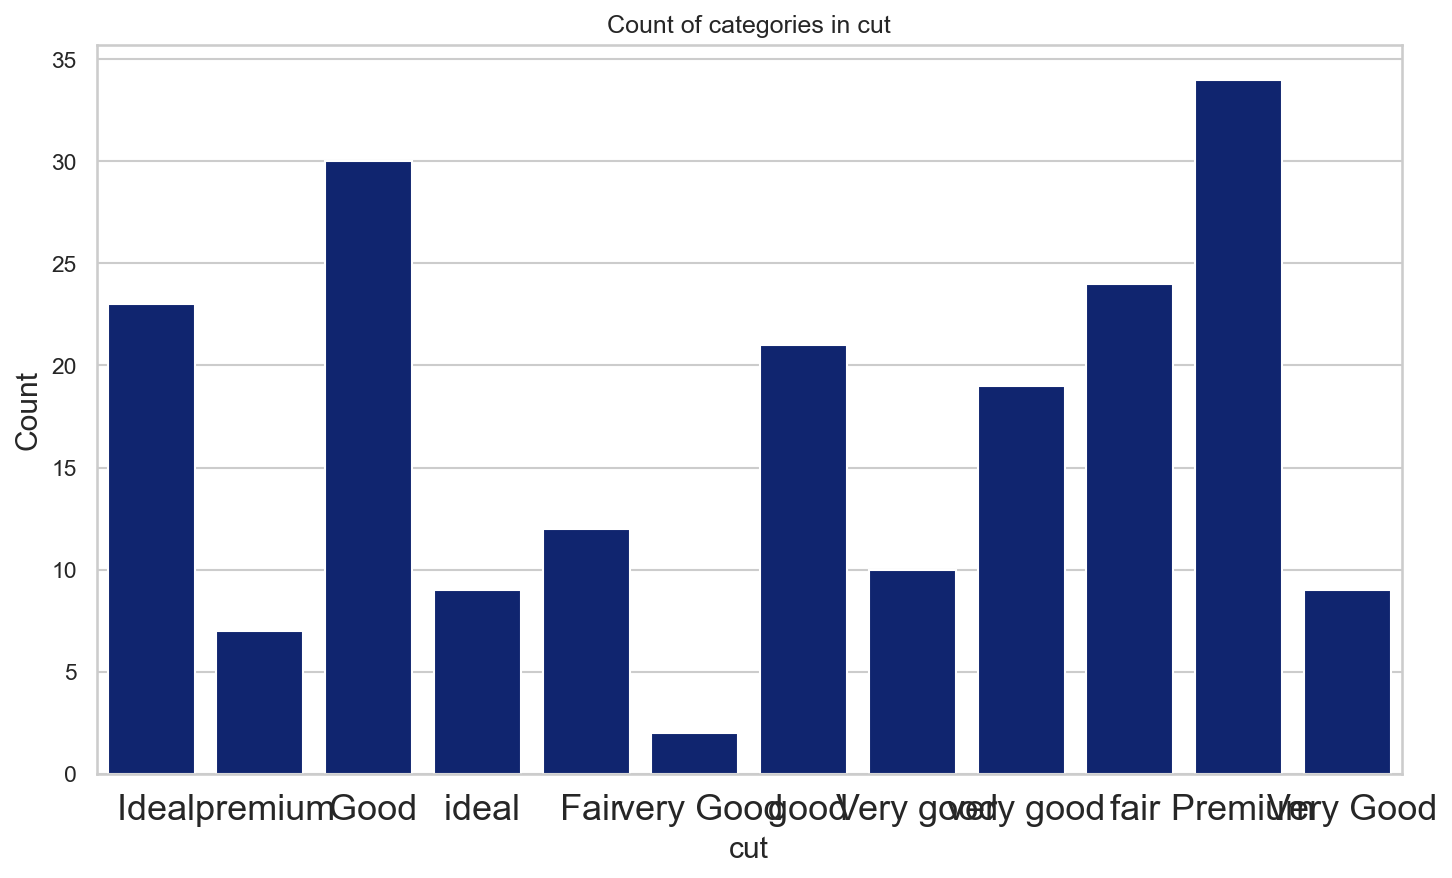

In [209]:
# Wizualizacja rozkładu zmiennych ciągłych
continuous_columns = ['carat', 'x dimension', 'y dimension', 'z dimension', 'depth', 'table', 'price']
for column in continuous_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Zależności ceny od innych zmiennych
for column in continuous_columns[:-1]:  # ostatnia kolumna to cena, więc jest pomijana
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[column], y=df['price'])
    plt.title(f'Price dependency on {column}')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

# Liczebność kategorii dla każdej z kolumn kategorycznych
categorical_columns = ['clarity', 'color', 'cut']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column])
    plt.title(f'Count of categories in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()